# Demo 06: Algorithms02

This demo will demonstrate the options for plotting projections and images on TIGRE. The functions have been in previous demos, but in here an exaustive explanation and usage of them is given.

## Define Geometry

In [13]:
import tigre
geo=tigre.geometry_default(high_quality=False)

## Load data and generate projections

In [14]:
import numpy as np
from tigre.utilities.Ax import Ax
from tigre.demos.Test_data import data_loader
# define angles
angles=np.linspace(0,2*np.pi,dtype=np.float32)
# load head phantom data
head=data_loader.load_head_phantom(number_of_voxels=geo.nVoxel)
# generate projections
projections=Ax(head,geo,angles,'interpolated')

## SART family of algorithms

In [ ]:

# There are 3 algorithms in this damily included in TIGRE: SART,SIRT and
# OS-SART.

# The main difference between them is the update process. 
# SART: Updates the image projection by projection
# SIRT: Updates the image using the whole set of projections at once
# OS-SART: middle ground. Updates the image using a subset of the
#          projections

# Of these algorithms, SART is generally the one reaching a better image
# (less L2 error) for the same amount of iterations, and SIRT is the
# worst (still relatively similar). However, SART needs increased
# computational time per iteration, as it needs to update the image very    often,
# while SIRT only updates the emage ones for the whole sets of projections.
# OS-SART lies in the middle, reaching similar convergence (L2 error per
# iteration) than SART but with less computational time than SART.

# Usage, with optional parameters.
# In the three algorithms, there are 4 mandatory input arguments:
# Projections, geometry, angles and number of iterations.

# Optional arguments for all of them
#==========================================================================
# 'lmbda': hyperparameter. The update will be multiplied by this number
# every iteration, to make the steps bigger or smaller. Default: 1

lmbda=1;


#'lmbdared': reduction multiplier for the hyperparameter.
# lmbda=lmbda*lmbdared every iterations, so the steps can be smaller
# the further the update. Default=0.99
lmbdared=0.999;

# 'Init' : Initialization method. Possible options are
#          'none' (default). There will be no initialization method, just
#                 the algorithm
  
#          'FDK'  Initialize the image with the result of FDK algorithm

#          'multigrid' Initialize using the multigrid method. The image
#                      will be solved in a small scale, and the size of it
#                      will increase until the desired size is reached.
#
#          'image'     Initialzies with a user given image. Not recoomended
#                      unless you really know what you are doing.

init=None;

#'InitImg' : related to init. The image to use for initializing the
# algorithm.

# 'verbose': boolean to make the algorithm display (or not) running state. 
#            default true.

verbose=True;
# 'QualMeas'     Asks the algorithm for a set of quality measurement
#                parameters. Input should contain a cell array of desired
#                quality measurement names. Example: {'CC','RMSE','MSSIM'}
#                These will be computed in each iteration. 
QualMeas='RMSE';
# OS-SART
# ========================================================================
# Additionally OS-SART includes a couple of other parameters, related to
# the subsets.
#
#   'blocksize':   Sets the projection block size used simultaneously. If
#                  BlockSize = 1 OS-SART becomes SART and if  BlockSize = length(angles)
#                  then OS-SART becomes SIRT. Default is 20.

# EXAMPLES:
# ----------------------------------------------------------------------
import tigre.algorithms as algs

iterations=50
sirt,sirt_l2err=algs.sirt(projections,geo,angles,iterations,**dict(computel2=True))
ossart,ossarterr=algs.ossart(projections,geo,angles,iterations,**dict(blocksize=20,computel2=True))
sart,sarterr=algs.sart(projections,geo,angles,iterations,**dict(computel2=True))


SIRT algorithm in progress.
Esitmated time until completetion (s): 14.897617
OSSART algorithm in progress.
Esitmated time until completetion (s): 27.362433
SART algorithm in progress.
Esitmated time until completetion (s): 254.08852


In [ ]:
from tigre.utilities.plotimg import plotimg
plotimg(np.hstack((sart,ossart,sirt)),slice=32,dim='z')

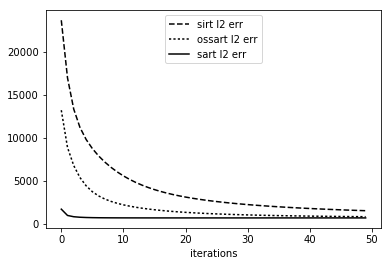

In [5]:
from matplotlib import pyplot as plt
xx=np.arange(iterations)
fig, ax = plt.subplots()
ax.plot(xx, sirt_l2err, 'k--', label='sirt l2 err')
ax.plot(xx, ossarterr, 'k:', label='ossart l2 err')
ax.plot(xx, sarterr, 'k', label='sart l2 err')
plt.xlabel('iterations')
legend = ax.legend(loc='upper center')
plt.show()